# Train model with data from 2010 & 2014 to predict 2018 results

In [60]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pickle
% matplotlib inline

### Load the training data

In [2]:
fifa_his=pd.read_csv('Training_fifa2.csv')

In [3]:
fifa_his.head()

,year,home_team,away_team,rank_dif,rating_dif,label
0,2010,Ghana,Nigeria,6,1.818182,0
1,2010,Argentina,Nigeria,-26,5.690909,0
2,2010,Greece,Nigeria,-16,6.727273,0
3,2010,Ghana,Australia,14,3.227273,2
4,2010,Germany,Australia,-19,3.772727,0


### create a inverted copy of the training data
Here we swap home and away team. We invert the features and change the label correspondingly.

In [4]:
fifa_his2=fifa_his.copy()
fifa_his2["home_team"] = fifa_his["away_team"]
fifa_his2["away_team"] = fifa_his["home_team"]

fifa_his2["rank_dif"] = -fifa_his["rank_dif"]
fifa_his2["rating_dif"] = -fifa_his["rating_dif"]

z={0:1,1:0,2:2}
fifa_his2["label"]=fifa_his["label"].map(z)

### combine the original and the inverted dataset

In [5]:
fifa_his3=pd.concat([fifa_his,fifa_his2])

In [6]:
fifa_his3.shape

(440, 6)

### create features and label

In [7]:
X=fifa_his3.loc[:,['rank_dif','rating_dif']]
X.shape

(440, 2)

In [8]:
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# X = pf.fit_transform(X)

In [9]:
X.shape

(440, 2)

In [10]:
y=fifa_his3.loc[:,'label']
y.shape

(440,)

### split test (2018) and train (2010, 2014) set

In [13]:
train = fifa_his3[fifa_his3['year'].isin([2010, 2014])]
test = fifa_his3[fifa_his3['year'] == 2018]

In [14]:
train.head()

,year,home_team,away_team,rank_dif,rating_dif,label
0,2010,Ghana,Nigeria,6,1.818182,0
1,2010,Argentina,Nigeria,-26,5.690909,0
2,2010,Greece,Nigeria,-16,6.727273,0
3,2010,Ghana,Australia,14,3.227273,2
4,2010,Germany,Australia,-19,3.772727,0


In [15]:
X_train = train.loc[:,['rank_dif','rating_dif']]
y_train = pd.Series(train.loc[:,'label'])

In [16]:
X_test = test.loc[:,['rank_dif','rating_dif']]
y_test = pd.Series(test.loc[:,'label'])

In [17]:
y_train.value_counts()

1    152
0    152
2     94
Name: label, dtype: int64

In [18]:
y_test.value_counts()

1    19
0    19
2     4
Name: label, dtype: int64

## train Logistic Regression

In [19]:
logreg = linear_model.LogisticRegression(C=1e5)

In [20]:
logreg.fit(X_train,y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
y_testpredlog = logreg.predict(X_test)
y_testpredlogproba = logreg.predict_proba(X_test)

In [48]:
print("accuracy: {}".format(logreg.score(X_test, y_test)))

accuracy: 0.6190476190476191


In [42]:
print(classification_report(y_test, y_testpredlog))

             precision    recall  f1-score   support

          0       0.62      0.68      0.65        19
          1       0.62      0.68      0.65        19
          2       0.00      0.00      0.00         4

avg / total       0.56      0.62      0.59        42



/Users/celsadiaz/.pyenv/versions/3.6.2/envs/redi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### calculate confusion matrix

In [49]:
confusion_matrix(y_test, y_testpredlog)

array([[13,  6,  0],
       [ 6, 13,  0],
       [ 2,  2,  0]])

In [63]:
norm_cm = confusion_matrix(y_test, y_testpredlog).astype('float') / confusion_matrix(y_test, y_testpredclf).sum(axis=1)

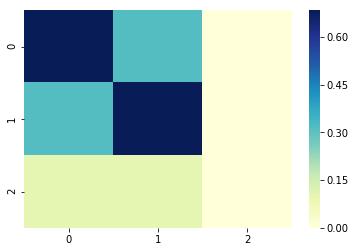

In [64]:
sns.heatmap(norm_cm,cmap="YlGnBu")

## Train Random Forest

In [50]:
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)

In [51]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
y_testpredclf = clf.predict(X_test)

In [53]:
print("accuracy: {}".format(clf.score(X_test, y_test)))

accuracy: 0.6190476190476191


In [54]:
print(classification_report(y_test, y_testpredlog))

             precision    recall  f1-score   support

          0       0.62      0.68      0.65        19
          1       0.62      0.68      0.65        19
          2       0.00      0.00      0.00         4

avg / total       0.56      0.62      0.59        42



/Users/celsadiaz/.pyenv/versions/3.6.2/envs/redi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
confusion_matrix(y_test, y_testpredclf)

array([[12,  7,  0],
       [ 5, 14,  0],
       [ 1,  3,  0]])

In [59]:
norm_cm = confusion_matrix(y_test, y_testpredclf).astype('float') / confusion_matrix(y_test, y_testpredclf).sum(axis=1)

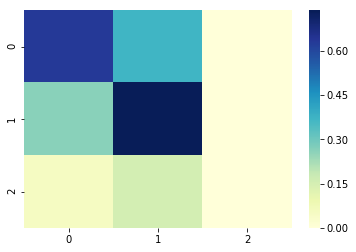

In [62]:
sns.heatmap(norm_cm,cmap="YlGnBu")

In [35]:
# save the model to disk
filename = 'Final_fifa_Logmodel.sav'
pickle.dump(logreg, open(filename, 'wb'))
 